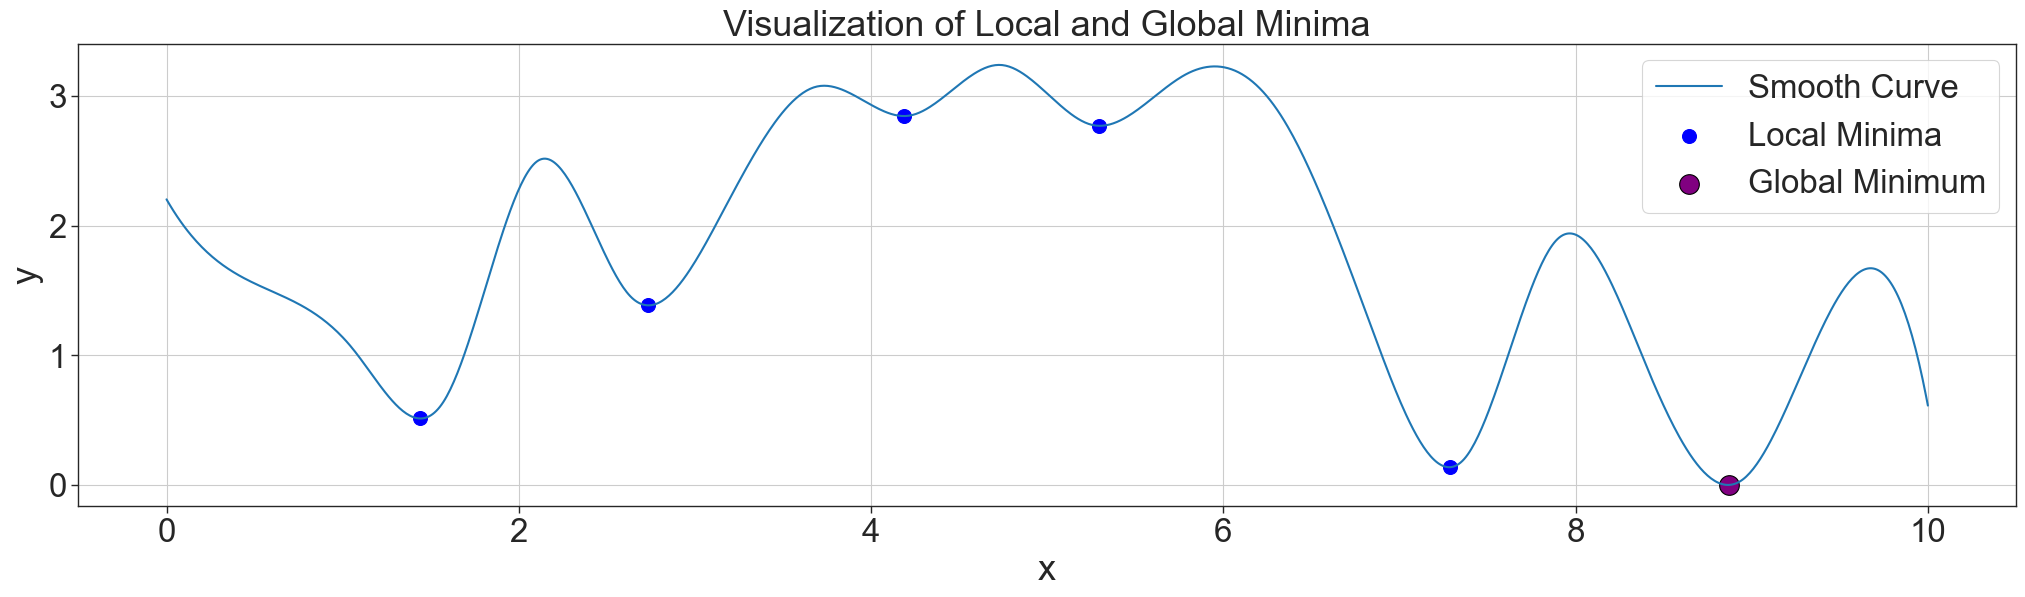

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.signal import find_peaks
import seaborn as sns

sns.set_style("ticks")
sns.set_context("paper", font_scale=2.7, rc={"lines.linewidth": 1.5})

# Generate a few random points
num_points = 20
x = np.linspace(0, 10, num_points)
random_values = np.random.randn(num_points)
y = np.cumsum(random_values)
y = (y - np.mean(y)) / np.std(y)

# Create a smooth curve through interpolation
x_smooth = np.linspace(x.min(), x.max(), 1000)
spl = make_interp_spline(x, y, k=3)  # k=3 for cubic spline
y_smooth = spl(x_smooth)

# Identify all local minima
valleys, _ = find_peaks(-y_smooth)

# Extract the coordinates of the valleys
valley_points = [(x_smooth[v], y_smooth[v]) for v in valleys]

# Identify the global minimum
global_min = min(valley_points, key=lambda item: item[1])

# Shift y-values so that the global minimum is at 0
shift_value = global_min[1]
y_smooth_shifted = y_smooth - shift_value
valley_points_shifted = [(v[0], v[1] - shift_value) for v in valley_points]
global_min_shifted = (global_min[0], global_min[1] - shift_value)

# Plot the smooth random wave
plt.figure(figsize=(25, 6))
plt.plot(x_smooth, y_smooth_shifted, label='Smooth Curve')

# Add dots for all valleys (local minima)
for valley in valley_points_shifted:
    plt.scatter(*valley, color='blue', s=100, label='Local Minima' if valley == valley_points_shifted[0] else "")

# Highlight the global minimum
plt.scatter(*global_min_shifted, color='purple', s=200, edgecolor='black', label='Global Minimum')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Visualization of Local and Global Minima')
plt.savefig('newwlocal_global_minima_shifted.png', dpi=300)
plt.show()

